# Agglomerative Clustering

É um algoritmo de clusterização, por isso também uma técnica não supervisionada!  
  
Está inserido dentro dos algoritmos chamados `Hierarchical Clustering`.  

### Hierarchical clustering

O clustering hierárquico (também chamado de análise de cluster hierárquica ou HCA) é um método de análise de cluster que busca construir uma hierarquia de clusters.

Existem 2 tipos de agrupamento hierárquico:
- <b> Aglomerativo </b> (de baixo para cima) e
- <b> Divisivo </b> (de cima para baixo).

Os algoritmos ascendentes tratam cada ponto de dados como um único cluster e mesclam os clusters mais próximos e sobem na hierarquia até que todos os clusters tenham sido mesclados e haja apenas um único cluster com todos os pontos de dados restantes.

Os algoritmos de cima para baixo são o oposto dos algoritmos de baixo para cima. Eles começam com um cluster que contém todos os pontos de dados e, em seguida, executa divisões e desce na hierarquia. Podemos visualizar a hierarquia usando um <a href="https://en.wikipedia.org/wiki/Dendrogram"> dendrograma </a> ou árvore.

No gráfico abaixo, você pode ver um exemplo de como funciona o agrupamento hierárquico ascendente.

![](https://camo.githubusercontent.com/ba07835dc2aba40a6644db39c9f9a595097ae25c/68747470733a2f2f6d656469612e67697068792e636f6d2f6d656469612f70534e435743454173677241732f67697068792e676966)   
Passos (aglomerativo):
1. Trate cada ponto de dados como um único cluster.
2. Escolha uma medida de similaridade / dissimilaridade (métrica de distância como distância euclidiana, como uma medida de similaridade, e um critério de ligação que especifica a dissimilaridade de conjuntos como uma função das distâncias entre pares de observações).
3. Combine os dois clusters com a menor ligação, ou seja, os dois clusters que estão mais próximos de acordo com nossa medida escolhida.
4. Repita 3 até que tenhamos apenas um cluster com todos os pontos de dados.
5. Escolha quantos aglomerados queremos olhando para o dendrograma.

<img style="height:600px;"  src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Iris_dendrogram.png/800px-Iris_dendrogram.png">

- O clustering hierárquico não exige que especifiquemos o número de clusters e podemos até selecionar qual número de clusters parece melhor, já que estamos construindo uma árvore.
- Além disso, o algoritmo não é sensível à escolha da métrica de distância; todos eles tendem a funcionar igualmente bem, enquanto com outros algoritmos de agrupamento, a escolha da métrica de distância é crítica.
- Um caso de uso particularmente bom de métodos de agrupamento hierárquico é quando os dados subjacentes têm uma estrutura hierárquica e você deseja recuperar a hierarquia; outros algoritmos de cluster não podem fazer isso.
- Essas vantagens do agrupamento hierárquico têm o custo de menor eficiência, pois tem uma complexidade de tempo de O (n³), ao contrário da complexidade linear do K-Means

PS. O objeto AgglomerativeClustering executa um agrupamento hierárquico usando uma abordagem ascendente: cada observação começa em seu próprio cluster, e os clusters são sucessivamente mesclados. Os critérios de ligação determinam a métrica usada para a estratégia de fusão:
- **Ward** minimiza a soma das diferenças quadradas em todos os clusters. É uma abordagem de minimização de variância e, nesse sentido, é semelhante à função objetivo k-médias, mas tratada com uma abordagem hierárquica aglomerativa.
- **A ligação máxima ou completa** minimiza a distância máxima entre as observações de pares de agrupamentos.
- **A ligação média** minimiza a média das distâncias entre todas as observações de pares de agrupamentos.
- **A ligação única** minimiza a distância entre as observações mais próximas de pares de clusters.

![](https://drek4537l1klr.cloudfront.net/rhys/Figures/fig17-3_alt.jpg)

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_linkage_comparison_0011.png)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Exemplo:
    
![](https://researchhubs.com/uploads/agglomerative%20numerical%20example%2019.jpg)

In [2]:
dados = {
    'valores': [
        [1.0, 1.0],
        [1.5, 1.5],
        [5.0, 5.0],
        [3.0, 4.0],
        [4.0, 4.0],
        [3.0, 3.5]
    ],
    'indices': [
        'A',
        'B',
        'C',
        'D',
        'E',
        'F'
    ],
    'colunas':[
        'x1',
        'x2'
    ]
}

In [3]:
df = pd.DataFrame(
    data=dados['valores'],
    columns=dados['colunas'],
    index=dados['indices']
)
df

,x1,x2
A,1.0,1.0
B,1.5,1.5
C,5.0,5.0
D,3.0,4.0
E,4.0,4.0
F,3.0,3.5


Uma animação mais interativa:  
https://educlust.dbvis.de/#  

In [4]:
X = df.values

In [5]:
data = []

for observacao in X*15:
    data.append({'x': observacao[0], 'y':observacao[1]})

data

[{'x': 15.0, 'y': 15.0},
 {'x': 22.5, 'y': 22.5},
 {'x': 75.0, 'y': 75.0},
 {'x': 45.0, 'y': 60.0},
 {'x': 60.0, 'y': 60.0},
 {'x': 45.0, 'y': 52.5}]

In [6]:
data_set = {
    'dataset_name': 'exemplo_1',
    'data': data
}
data_set

{'dataset_name': 'exemplo_1',
 'data': [{'x': 15.0, 'y': 15.0},
  {'x': 22.5, 'y': 22.5},
  {'x': 75.0, 'y': 75.0},
  {'x': 45.0, 'y': 60.0},
  {'x': 60.0, 'y': 60.0},
  {'x': 45.0, 'y': 52.5}]}

In [7]:
import json

json.dumps(data_set)

with open('exemplo.json', 'w') as file:
    json.dump(data_set, file)

In [8]:
!ls

ada_850_ml2-env  Aula03.ipynb  Aula06.ipynb  env.sh	   requirements.txt
Aula01.ipynb	 Aula04.ipynb  Aula07.ipynb  exemplo.json
Aula02.ipynb	 Aula05.ipynb  dados	     README.md


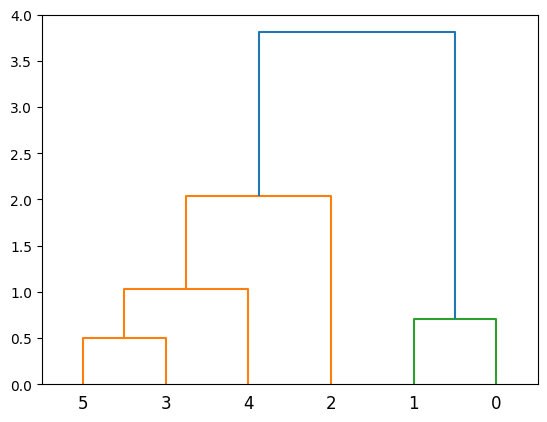

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage = linkage(X, 'centroid')

label_list = range(1, 7)

dendrogram(
    linkage, 
    orientation='top', 
#     labels=label_list, 
    distance_sort='descending',
    show_leaf_counts=True
)

plt.show()

Um exemplo mais complexo...

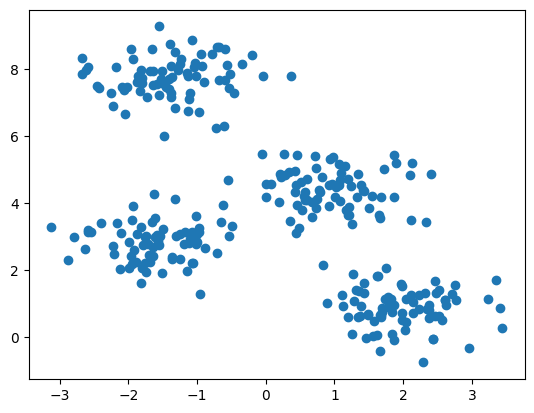

In [10]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=0.6, random_state=0)

plt.scatter(X[:,0], X[:,1])

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [11]:
colunas = [f'X{i}' for i in range(X.shape[1])]
colunas

['X0', 'X1']

In [12]:
X_df = pd.DataFrame(data=X, columns=colunas)

X_df.head()

,X0,X1
0,0.836857,2.136359
1,-1.413658,7.409623
2,1.155213,5.099619
3,-1.018616,7.814915
4,1.271351,1.892542


In [13]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')

clustering.fit(X_df)

AgglomerativeClustering(n_clusters=4)

In [15]:
clustering.labels_

array([2, 0, 1, 0, 2, 2, 3, 1, 0, 0, 3, 0, 1, 0, 2, 1, 1, 2, 3, 3, 2, 2,
       1, 3, 3, 1, 2, 1, 3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 2, 1, 3, 1, 1,
       3, 3, 0, 3, 0, 2, 3, 2, 0, 2, 2, 3, 0, 3, 0, 2, 0, 1, 0, 3, 3, 3,
       0, 2, 0, 3, 1, 3, 0, 3, 3, 0, 3, 1, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1,
       0, 0, 1, 2, 0, 3, 3, 1, 2, 2, 1, 3, 0, 2, 0, 2, 1, 2, 2, 1, 0, 1,
       3, 3, 2, 0, 2, 1, 0, 2, 2, 1, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 0, 3,
       3, 2, 0, 3, 3, 0, 1, 0, 0, 3, 1, 3, 1, 3, 0, 1, 0, 0, 0, 1, 0, 1,
       2, 3, 0, 3, 2, 1, 0, 1, 1, 2, 1, 3, 3, 1, 2, 1, 1, 0, 2, 1, 3, 0,
       2, 2, 1, 3, 2, 1, 3, 3, 1, 1, 1, 1, 2, 0, 1, 3, 1, 1, 3, 3, 3, 1,
       3, 0, 1, 3, 2, 3, 1, 0, 3, 0, 1, 0, 1, 3, 1, 1, 0, 3, 3, 2, 2, 1,
       0, 2, 2, 3, 2, 3, 1, 0, 0, 1, 1, 0, 1, 2, 3, 1, 2, 3, 0, 3, 2, 1,
       2, 0, 0, 0, 0, 3, 3, 0, 1, 3, 2, 1, 3, 3, 3, 2, 2, 0, 1, 1, 3, 2,
       0, 3, 1, 0, 1, 2, 2, 3, 3, 1, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2,
       0, 3, 0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 3])

In [16]:
X_df_cluster = X_df.copy()
X_df_cluster['label'] = clustering.labels_
X_df_cluster.head()

,X0,X1,label
0,0.836857,2.136359,2
1,-1.413658,7.409623,0
2,1.155213,5.099619,1
3,-1.018616,7.814915,0
4,1.271351,1.892542,2


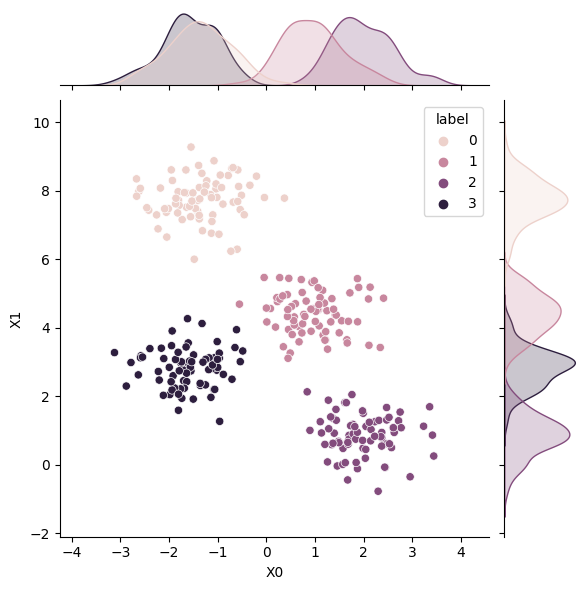

In [17]:
sns.jointplot(data=X_df_cluster, x='X0', y='X1', hue='label')

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

For n_clusters = 2 The average silhouette_score is : 0.54731479631826
For n_clusters = 3 The average silhouette_score is : 0.58977292182092
For n_clusters = 4 The average silhouette_score is : 0.6819938690643478
For n_clusters = 5 The average silhouette_score is : 0.5875473435823221
For n_clusters = 6 The average silhouette_score is : 0.49317873615324764


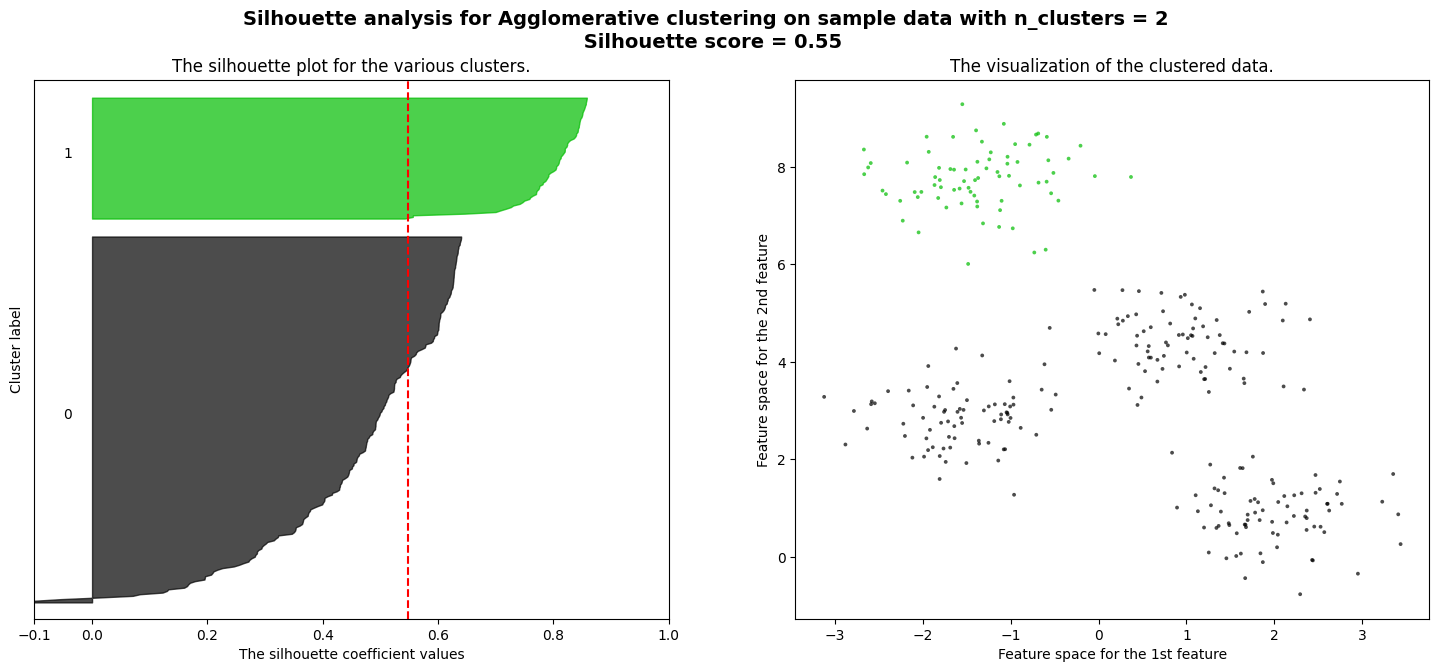

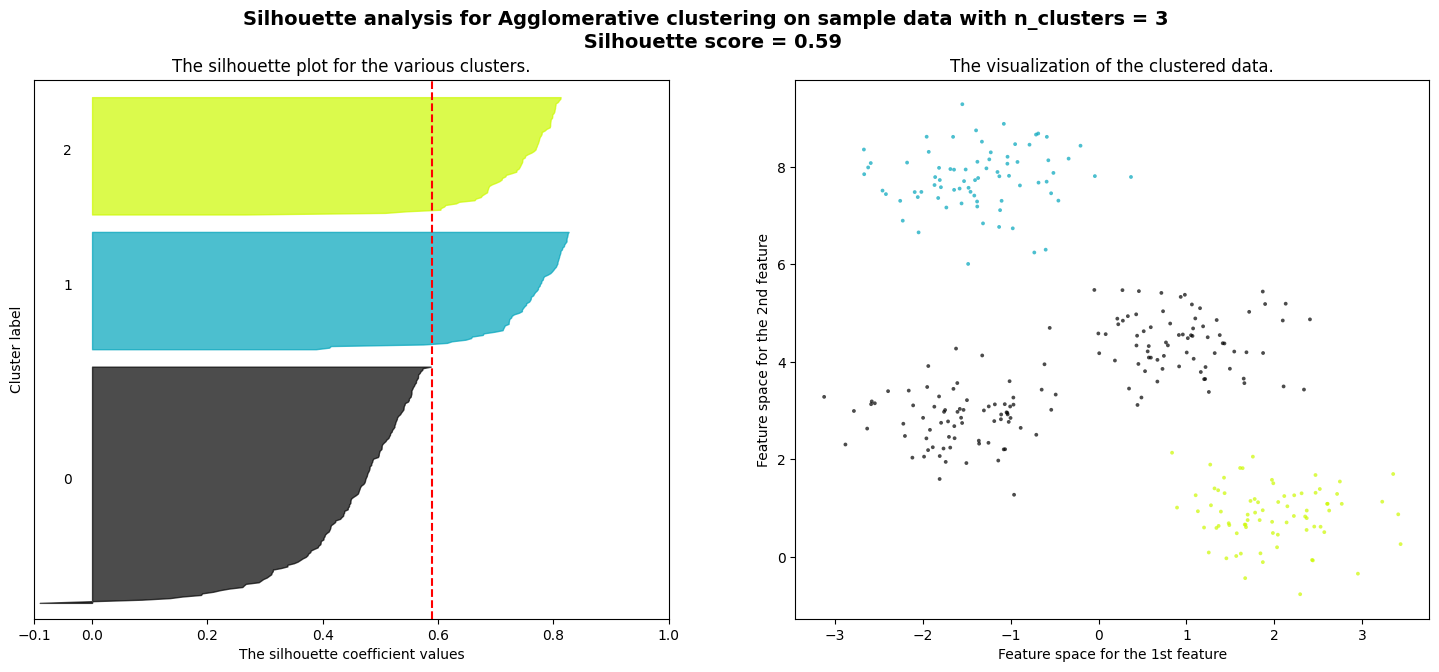

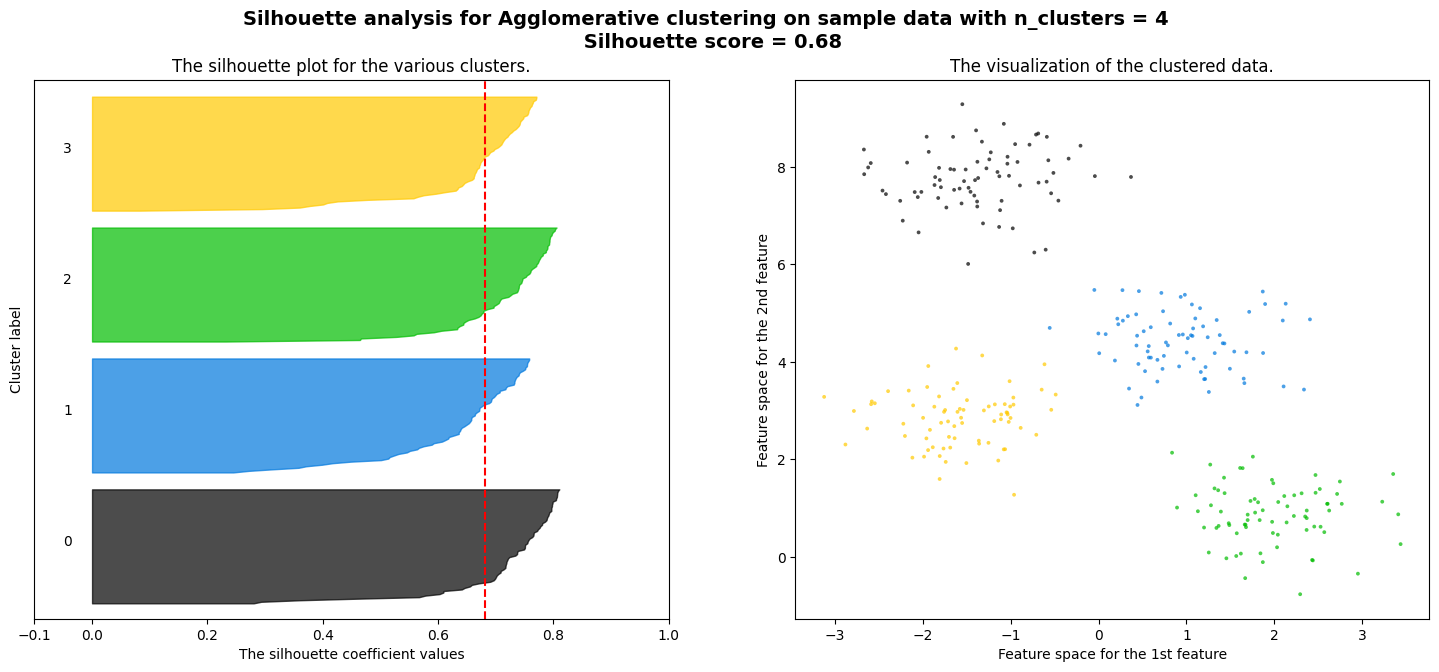

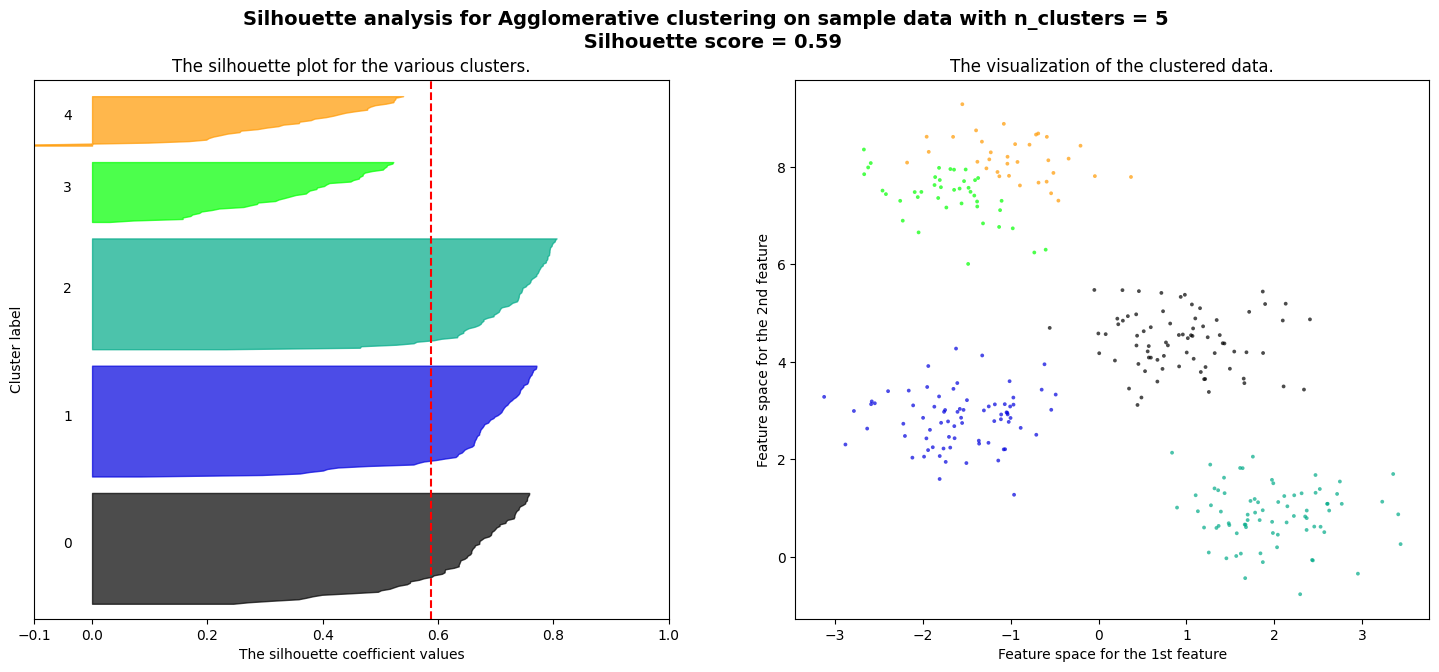

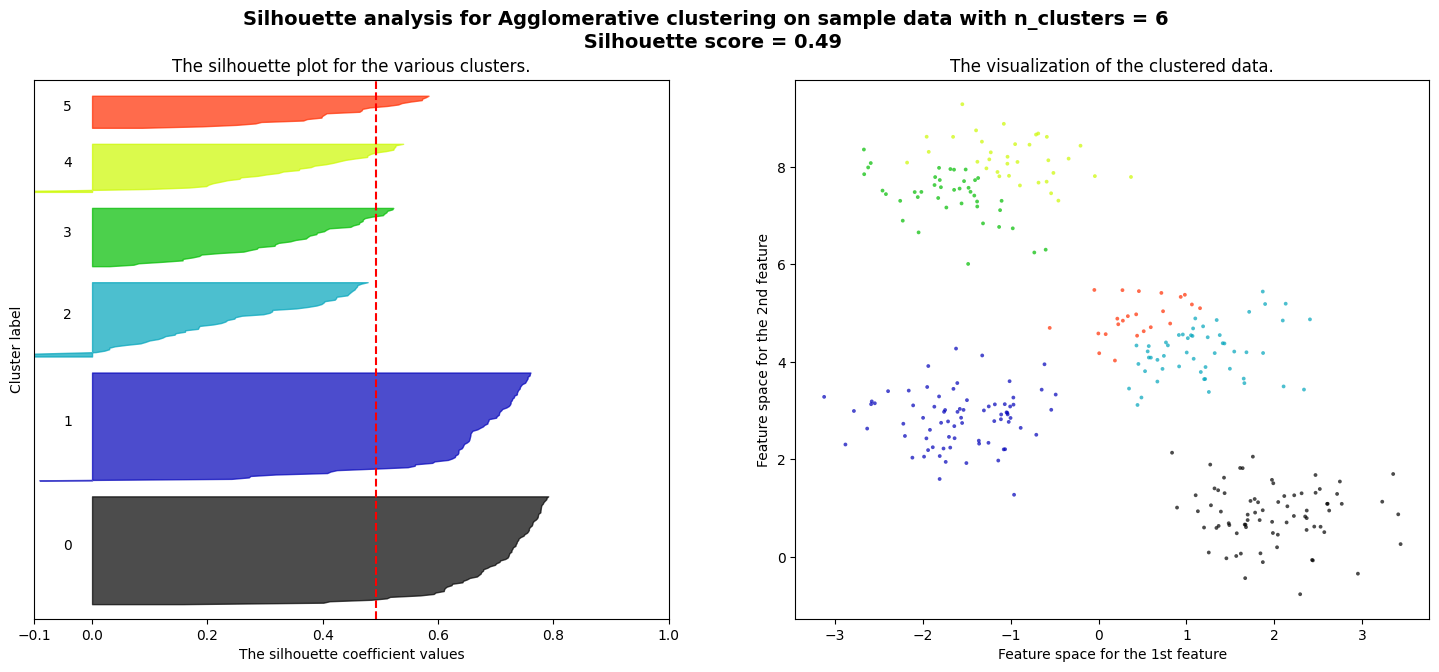

In [18]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(
#         centers[:, 0],
#         centers[:, 1],
#         marker="o",
#         c="white",
#         alpha=1,
#         s=200,
#         edgecolor="k",
#     )

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        f"Silhouette analysis for Agglomerative clustering on sample data with n_clusters = {n_clusters} \n Silhouette score = {silhouette_avg:.2f}",
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Plotando...

In [22]:
linkage = linkage(X, 'single')

dendrogram(
    linkage, 
    orientation='top', 
    distance_sort='descending',
    show_leaf_counts=True
)

plt.show()

TypeError: 'numpy.ndarray' object is not callable

Dicas:  
    - Estudar sobre `Modelos Mistura de Gaussianas (GMM)`

#### Exercício
Aplique a clusterização aglomerativa no data set de vinhos e verifique o desempenho em relação ao K-Means

# Preparação para a Avaliação e Projeto